In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# from google.colab import files
# uploaded = files.upload()

In [3]:
# import data from csv
lab03data = pd.read_csv('Lab_3_Raw_Data.csv', header=None, skiprows=2)  
lab03data_df = pd.DataFrame(lab03data)

# 5) Determine ey, ex, and gamma_xy

In [4]:
# store relevant data as numpy arrays
# ey (ch 2)
ey_al_bend_123 = np.asarray(lab03data_df[2][0:], dtype=float)
ey_al_bend_456 = np.asarray(lab03data_df[7][0:], dtype=float)

ey_al_torsion_123 = np.asarray(lab03data_df[12][0:], dtype=float)
ey_al_torsion_456 = np.asarray(lab03data_df[17][0:], dtype=float)

ey_comp_bend_123 = np.asarray(lab03data_df[22][0:], dtype=float)
ey_comp_bend_456 = np.asarray(lab03data_df[27][0:], dtype=float)

ey_comp_torsion_123 = np.asarray(lab03data_df[32][0:], dtype=float)
ey_comp_torsion_456 = np.asarray(lab03data_df[37][0:], dtype=float)

# ex (calculated)
ex_al_bend_123 = np.asarray(lab03data_df[4][0:], dtype=float)
ex_al_bend_456 = np.asarray(lab03data_df[9][0:], dtype=float)

ex_al_torsion_123 = np.asarray(lab03data_df[14][0:], dtype=float)
ex_al_torsion_456 = np.asarray(lab03data_df[19][0:], dtype=float)

ex_comp_bend_123 = np.asarray(lab03data_df[24][0:], dtype=float)
ex_comp_bend_456 = np.asarray(lab03data_df[29][0:], dtype=float)

ex_comp_torsion_123 = np.asarray(lab03data_df[34][0:], dtype=float)
ex_comp_torsion_456 = np.asarray(lab03data_df[39][0:], dtype=float)

# gamma_xy
gamma_al_bend_123 = np.asarray(lab03data_df[5][0:], dtype=float)
gamma_al_bend_456 = np.asarray(lab03data_df[10][0:], dtype=float)

gamma_al_torsion_123 = np.asarray(lab03data_df[15][0:], dtype=float)
gamma_al_torsion_456 = np.asarray(lab03data_df[20][0:], dtype=float)

gamma_comp_bend_123 = np.asarray(lab03data_df[25][0:], dtype=float)
gamma_comp_bend_456 = np.asarray(lab03data_df[30][0:], dtype=float)

gamma_comp_torsion_123 = np.asarray(lab03data_df[35][0:], dtype=float)
gamma_comp_torsion_456 = np.asarray(lab03data_df[40][0:], dtype=float)

In [5]:
# define loads
P = np.array([0,1,2,3,4,5,6]) # lb

# 6) Determine moment due to loading at each rosette location, Ixx, and z, and use the bending theory to solve for the bending stress at each roestte and after each load is added

In [6]:
# given parameters
diameter = 1.5 # in
L = 25 + 7/8 # in

E_al = 10e6 # psi
v_al = 0.34 # n.d.
t_al = 0.125 # in

E_comp = 1.92e6 # psi
v_comp = 0.51 # n.d.
t_comp = 0.075 # in

In [7]:
# calculate r_o and r_i
r_o = 0.5*diameter
r_i_al = r_o - t_al
r_i_comp = r_o - t_comp

In [8]:
# calculate (bending?) moment due to loading at each rosette location

# longitudinal position of rosettes
y_123 = 8 + 3.75 # in
y_456 = 20.375+3.75 # in

M_x_123 = abs(P*y_123)
M_x_456 = abs(P*y_456)

# print(M_x_123)
# print(M_x_456)

In [9]:
# calculate I_xx
I_xx_al = np.pi/4 * (r_o**4 - r_i_al**4)
I_xx_comp = np.pi/4 * (r_o**4 - r_i_comp**4)

In [10]:
# calculate z (vertical distance from the neutral axis)
z = r_o

In [11]:
# solve for bending stress (eqn 3.1)
sigma_y_al_123 = M_x_123 * z / I_xx_al
sigma_y_al_456 = M_x_456 * z / I_xx_al

sigma_y_comp_123 = M_x_123 * z / I_xx_comp
sigma_y_comp_456 = M_x_456 * z / I_xx_comp

print("Step 6 Bending Values to compare to Step 12")
print(sigma_y_al_123)
print(sigma_y_al_456)

print(sigma_y_comp_123)
print(sigma_y_comp_456)

Step 6 Bending Values to compare to Step 12
[  0.          68.49307691 136.98615382 205.47923073 273.97230764
 342.46538455 410.95846146]
[  0.         140.62940259 281.25880518 421.88820778 562.51761037
 703.14701296 843.77641555]
[  0.         103.11741545 206.23483089 309.35224634 412.46966178
 515.58707723 618.70449268]
[   0.          211.7197998   423.4395996   635.1593994   846.87919919
 1058.59899899 1270.31879879]


# 7) Find v by plotting ey vs ex, find E by plotting sigma_y vs ey from the results in (5) and (6). Determine if material behavior is linear or nonlinear

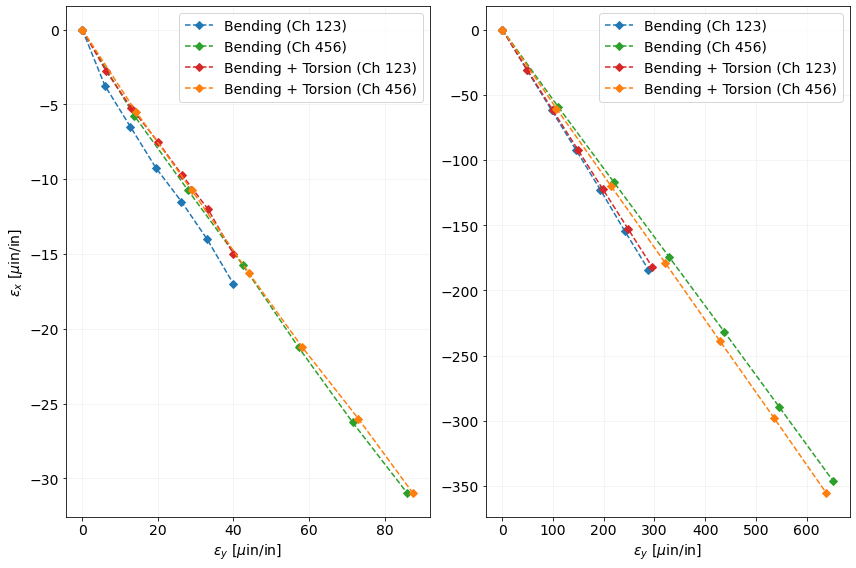

In [12]:
# plot ex vs ey
fig = plt.figure(figsize=(12,8), tight_layout=True)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# ax1.plot(ex_al_bend_123, ey_al_bend_123, 'D--', color='tab:blue', label=r'Bending (Ch 123)')
# ax1.plot(ex_al_bend_456, ey_al_bend_456, 'D--', color='tab:green', label=r'Bending (Ch 456)')
# ax1.plot(ex_al_torsion_123, ey_al_torsion_123, 'D--', color='tab:red', label=r'Torsion (Ch 123)')
# ax1.plot(ex_al_torsion_456, ey_al_torsion_456, 'D--', color='tab:orange', label=r'Torsion (Ch 456)')

# ax2.plot(ex_comp_bend_123, ey_comp_bend_123, 'D--', color='tab:blue', label=r'Bending (Ch 123)')
# ax2.plot(ex_comp_bend_456, ey_comp_bend_456, 'D--', color='tab:green', label=r'Bending (Ch 456)')
# ax2.plot(ex_comp_torsion_123, ey_comp_torsion_123, 'D--', color='tab:red', label=r'Torsion (Ch 123)')
# ax2.plot(ex_comp_torsion_456, ey_comp_torsion_456, 'D--', color='tab:orange', label=r'Torsion (Ch 456)')

# ax1.set_xlabel( r'$\epsilon_x$ [$\mu$in/in]',fontsize=14)
# ax1.set_ylabel( r'$\epsilon_y$ [$\mu$in/in]',fontsize=14)

# plot with ex (transverse) on y axis and ey (axial) on x axis
ax1.plot(ey_al_bend_123, ex_al_bend_123, 'D--', color='tab:blue', label=r'Bending (Ch 123)')
ax1.plot(ey_al_bend_456, ex_al_bend_456, 'D--', color='tab:green', label=r'Bending (Ch 456)')
ax1.plot(ey_al_torsion_123, ex_al_torsion_123, 'D--', color='tab:red', label=r'Bending + Torsion (Ch 123)')
ax1.plot(ey_al_torsion_456, ex_al_torsion_456, 'D--', color='tab:orange', label=r'Bending + Torsion (Ch 456)')

ax2.plot(ey_comp_bend_123, ex_comp_bend_123, 'D--', color='tab:blue', label=r'Bending (Ch 123)')
ax2.plot(ey_comp_bend_456, ex_comp_bend_456, 'D--', color='tab:green', label=r'Bending (Ch 456)')
ax2.plot(ey_comp_torsion_123, ex_comp_torsion_123, 'D--', color='tab:red', label=r'Bending + Torsion (Ch 123)')
ax2.plot(ey_comp_torsion_456, ex_comp_torsion_456, 'D--', color='tab:orange', label=r'Bending + Torsion (Ch 456)')

ax1.set_xlabel( r'$\epsilon_y$ [$\mu$in/in]',fontsize=14)
ax1.set_ylabel( r'$\epsilon_x$ [$\mu$in/in]',fontsize=14)

ax2.set_xlabel( r'$\epsilon_y$ [$\mu$in/in]',fontsize=14)

ax1.legend(fontsize=14)
ax2.legend(fontsize=14)

ax1.tick_params(labelsize=14)
ax2.tick_params(labelsize=14)
ax1.grid(color='0.95')
ax2.grid(color='0.95')

plt.savefig('exvsey.png')

In [13]:
# calculate slope of lines (v)
# polyfit calculates a 1 degree line of best fit, the 0th index is the slope of the line
v_al_bend_123 = -np.polyfit(ey_al_bend_123, ex_al_bend_123,1)[0]
v_al_bend_456 = -np.polyfit(ey_al_bend_456, ex_al_bend_456,1)[0]
v_al_torsion_123 = -np.polyfit(ey_al_torsion_123, ex_al_torsion_123,1)[0]
v_al_torsion_456 = -np.polyfit(ey_al_torsion_456, ex_al_torsion_456,1)[0]

v_comp_bend_123 = -np.polyfit(ey_comp_bend_123, ex_comp_bend_123,1)[0]
v_comp_bend_456 = -np.polyfit(ey_comp_bend_456, ex_comp_bend_456,1)[0]
v_comp_torsion_123 = -np.polyfit(ey_comp_torsion_123, ex_comp_torsion_123,1)[0]
v_comp_torsion_456 = -np.polyfit(ey_comp_torsion_456, ex_comp_torsion_456,1)[0]

# compute average v for each material
v_al_avg = (v_al_bend_123+v_al_bend_456+v_al_torsion_123+v_al_torsion_456)/4
v_comp_avg = (v_comp_bend_123+v_comp_bend_456+v_comp_torsion_123+v_comp_torsion_456)/4

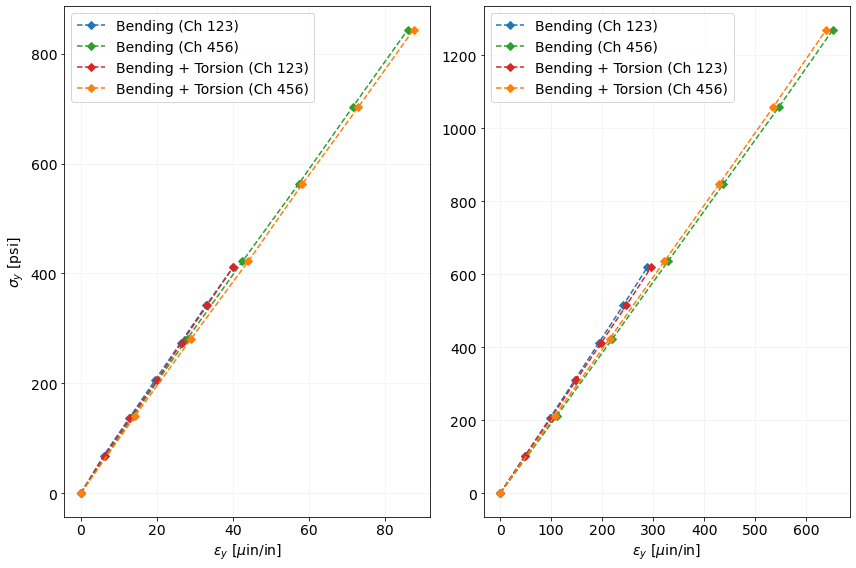

In [14]:
# plot sigma_y vs e_y
fig = plt.figure(figsize=(12,8), tight_layout=True)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# plot with ey (strain) on x axis and sigma_y (stress) on y axis
ax1.plot(ey_al_bend_123, sigma_y_al_123, 'D--', color='tab:blue', label=r'Bending (Ch 123)')
ax1.plot(ey_al_bend_456, sigma_y_al_456, 'D--', color='tab:green', label=r'Bending (Ch 456)')
ax1.plot(ey_al_torsion_123, sigma_y_al_123, 'D--', color='tab:red', label=r'Bending + Torsion (Ch 123)')
ax1.plot(ey_al_torsion_456, sigma_y_al_456, 'D--', color='tab:orange', label=r'Bending + Torsion (Ch 456)')

ax2.plot(ey_comp_bend_123, sigma_y_comp_123, 'D--', color='tab:blue', label=r'Bending (Ch 123)')
ax2.plot(ey_comp_bend_456, sigma_y_comp_456, 'D--', color='tab:green', label=r'Bending (Ch 456)')
ax2.plot(ey_comp_torsion_123, sigma_y_comp_123, 'D--', color='tab:red', label=r'Bending + Torsion (Ch 123)')
ax2.plot(ey_comp_torsion_456, sigma_y_comp_456, 'D--', color='tab:orange', label=r'Bending + Torsion (Ch 456)')

ax1.set_xlabel( r'$\epsilon_y$ [$\mu$in/in]',fontsize=14)
ax1.set_ylabel( r'$\sigma_y$ [psi]',fontsize=14)

ax2.set_xlabel( r'$\epsilon_y$ [$\mu$in/in]',fontsize=14)

ax1.legend(fontsize=14)
ax2.legend(fontsize=14)

ax1.tick_params(labelsize=14)
ax2.tick_params(labelsize=14)

ax1.grid(color='0.95')
ax2.grid(color='0.95')

plt.savefig('ey_vs_sigma_y.png')

In [15]:
# calculate slope of lines (E)
# polyfit calculates a 1 degree line of best fit, the 0th index is the slope of the line
E_al_bend_123 = np.polyfit(ey_al_bend_123*1e-6, sigma_y_al_123,1)[0]
E_al_bend_456 = np.polyfit(ey_al_bend_456*1e-6, sigma_y_al_456,1)[0]
E_al_torsion_123 = np.polyfit(ey_al_torsion_123*1e-6, sigma_y_al_123,1)[0]
E_al_torsion_456 = np.polyfit(ey_al_torsion_456*1e-6, sigma_y_al_456,1)[0]

E_comp_bend_123 = np.polyfit(ey_comp_bend_123*1e-6, sigma_y_comp_123,1)[0]
E_comp_bend_456 = np.polyfit(ey_comp_bend_456*1e-6, sigma_y_comp_456,1)[0]
E_comp_torsion_123 = np.polyfit(ey_comp_torsion_123*1e-6, sigma_y_comp_123,1)[0]
E_comp_torsion_456 = np.polyfit(ey_comp_torsion_456*1e-6, sigma_y_comp_456,1)[0]

# compute average E for each material
E_al_avg = (E_al_bend_123+E_al_bend_456+E_al_torsion_123+E_al_torsion_456)/4
E_comp_avg = (E_comp_bend_123+E_comp_bend_456+E_comp_torsion_123+E_comp_torsion_456)/4
E_calc = (E_al_bend_456+E_al_torsion_456)/2
E_calc

9698699.452452617

# 8) Find My for each load. Calculate σ_ys for each loading. Plot σ_ys vs measured γ_ys to get G, the slope

In [16]:
My = 10*P

In [17]:
# Aluminum
sigma_sy_al = (2*My)/(np.pi*t_al*(r_o+r_i_al)**2)
gamma_yx_al_123 = gamma_al_torsion_123*1e-6
gamma_yx_al_456 = gamma_al_torsion_456*1e-6
slope_al_123 = np.polyfit(gamma_yx_al_123, sigma_sy_al, 1)[0]
slope_al_456 = np.polyfit(gamma_yx_al_456, sigma_sy_al, 1)[0]
G_al = (slope_al_123+slope_al_456)/2/145000 #psi to GPa
print('G of Al:', G_al)

G of Al: 23.831103706323574


In [18]:
# Composite
sigma_sy_comp = (2*My)/(np.pi*t_comp*(r_o+r_i_comp)**2)
gamma_yx_comp_123 = gamma_comp_torsion_123*1e-6
gamma_yx_comp_456 = gamma_comp_torsion_456*1e-6
slope_comp_123 = np.polyfit(gamma_yx_comp_123, sigma_sy_comp, 1)[0]
slope_comp_456 = np.polyfit(gamma_yx_comp_456, sigma_sy_comp, 1)[0]
G_comp = (slope_comp_123+slope_comp_456)/2/145000 #psi to GPa
print('G of Comp:', G_comp)

G of Comp: 16.637651338911574


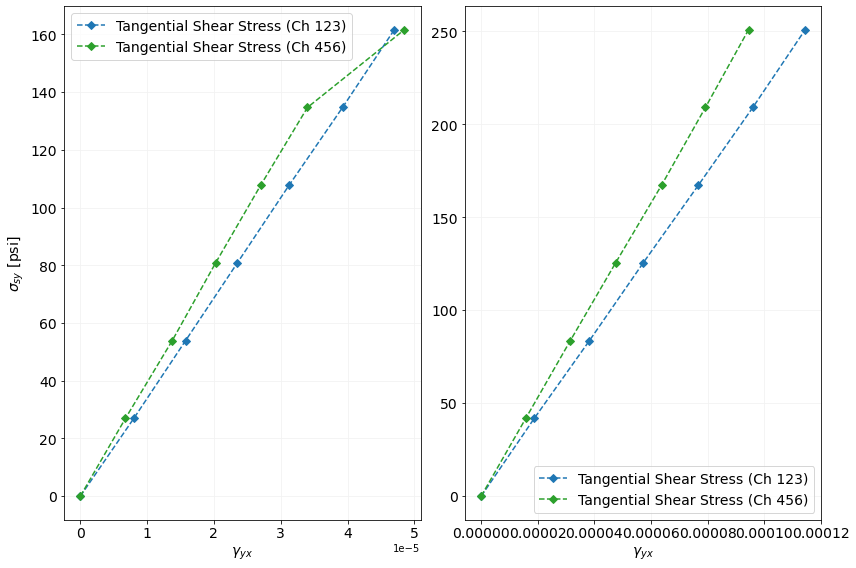

In [19]:
# plot sigma_y vs e_y
fig = plt.figure(figsize=(12,8), tight_layout=True)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# plot with ey (strain) on x axis and sigma_y (stress) on y axis
ax1.plot(gamma_yx_al_123, sigma_sy_al, 'D--', color='tab:blue', label=r'Tangential Shear Stress (Ch 123)')
ax1.plot(gamma_yx_al_456, sigma_sy_al, 'D--', color='tab:green', label=r'Tangential Shear Stress (Ch 456)')

ax2.plot(gamma_yx_comp_123, sigma_sy_comp, 'D--', color='tab:blue', label=r'Tangential Shear Stress (Ch 123)')
ax2.plot(gamma_yx_comp_456, sigma_sy_comp, 'D--', color='tab:green', label=r'Tangential Shear Stress (Ch 456)')

ax1.set_xlabel( r'$\gamma_{yx}$',fontsize=14)
ax1.set_ylabel( r'$\sigma_{sy}$ [psi]',fontsize=14)

ax2.set_xlabel( r'$\gamma_{yx}$',fontsize=14)

ax1.legend(fontsize=14)
ax2.legend(fontsize=14)

ax1.tick_params(labelsize=14)
ax2.tick_params(labelsize=14)

ax1.grid(color='0.95')
ax2.grid(color='0.95')

plt.savefig('sigma_ys_vs_gamma_ys.png')

# 10) Find Poisson's ratio v with E and G

In [20]:
G_comp9 = 2.8876E6
G_al9 = 3.7716E6
G_comp_avg = ((G_comp*145000) + G_comp9) / 2
G_al_avg = ((G_al*145000) + G_al9) / 2
v_al10 = ((E_al_avg)/(2*G_al_avg)) - 1
v_comp10 = ((1.92E6)/(2*(1.3E6))) - 1
print(E_al_avg)
print(G_al_avg)
print(v_al10)
print(v_comp10)

9962372.382083159
3613555.018708459
0.3784724918404405
-0.2615384615384615


# 12) Calculate $\sigma_x$,$\sigma_y$,$\sigma_{xy}$. Make comparison to steps (6) and (8)

In [21]:
# Expected values
E_al = 10.0E6
E_comp = 1.92E6
v_al = 0.34
v_comp = 0.51

G_al = E_al / (2*(1 + v_al))
G_comp = E_comp / (2*(1 + v_comp))
print(G_al)
sigmax_al_bend_123 = (E_al / (1 - v_al**2)) * (ex_al_bend_123 + v_al*ey_al_bend_123) * (1.0E-6)
sigmax_al_bend_456 = (E_al / (1 - v_al**2)) * (ex_al_bend_456 + v_al*ey_al_bend_456) * (1.0E-6)

sigmax_al_torsion_123 = (E_al / (1 - v_al**2)) * (ex_al_torsion_123 + v_al*ey_al_torsion_123) * (1.0E-6)
sigmax_al_torsion_456 = (E_al / (1 - v_al**2)) * (ex_al_torsion_456 + v_al*ey_al_torsion_456) * (1.0E-6)

sigmax_comp_bend_123 = (E_comp / (1 - v_comp**2)) * (ex_comp_bend_123 + v_comp*ey_comp_bend_123) * (1.0E-6)
sigmax_comp_bend_456 = (E_comp / (1 - v_comp**2)) * (ex_comp_bend_456 + v_comp*ey_comp_bend_456) * (1.0E-6)

sigmax_comp_torsion_123 = (E_comp / (1 - v_comp**2)) * (ex_comp_torsion_123 + v_comp*ey_comp_torsion_123) * (1.0E-6)
sigmax_comp_torsion_456 = (E_comp / (1 - v_comp**2)) * (ex_comp_torsion_456 + v_comp*ey_comp_torsion_456) * (1.0E-6)

sigmay_al_bend_123 = (E_al / (1 - v_al**2)) * (ey_al_bend_123 + v_al*ex_al_bend_123) * (1.0E-6)
sigmay_al_bend_456 = (E_al / (1 - v_al**2)) * (ey_al_bend_456 + v_al*ex_al_bend_456) * (1.0E-6)

sigmay_al_torsion_123 = (E_al / (1 - v_al**2)) * (ey_al_torsion_123 + v_al*ex_al_torsion_123) * (1.0E-6)
sigmay_al_torsion_456 = (E_al / (1 - v_al**2)) * (ey_al_torsion_456 + v_al*ex_al_torsion_456) * (1.0E-6)

sigmay_comp_bend_123 = (E_comp / (1 - v_comp**2)) * (ey_comp_bend_123 + v_comp*ex_comp_bend_123) * (1.0E-6)
sigmay_comp_bend_456 = (E_comp / (1 - v_comp**2)) * (ey_comp_bend_456 + v_comp*ex_comp_bend_456) * (1.0E-6)

sigmay_comp_torsion_123 = (E_comp / (1 - v_comp**2)) * (ey_comp_torsion_123 + v_comp*ex_comp_torsion_123) * (1.0E-6)
sigmay_comp_torsion_456 = (E_comp / (1 - v_comp**2)) * (ey_comp_torsion_456 + v_comp*ex_comp_torsion_456) * (1.0E-6)

sigmaxy_al_bend_123 = G_al*gamma_al_bend_123 * (1.0E-6)
sigmaxy_al_bend_456 = G_al*gamma_al_bend_456 * (1.0E-6)

sigmaxy_al_torsion_123 = G_al*gamma_al_torsion_123 * (1.0E-6)
sigmaxy_al_torsion_456 = G_al*gamma_al_torsion_456 * (1.0E-6)

sigmaxy_comp_bend_123 = G_comp*gamma_comp_bend_123 * (1.0E-6)
sigmaxy_comp_bend_456 = G_comp*gamma_comp_bend_456 * (1.0E-6)

sigmaxy_comp_torsion_123 = G_comp*gamma_comp_torsion_123 * (1.0E-6)
sigmaxy_comp_torsion_456 = G_comp*gamma_comp_torsion_456 * (1.0E-6)

#sigma x
# print(sigmax_al_bend_123, sigmax_al_bend_456)
# print(sigmax_al_torsion_123)
# print(sigmax_al_torsion_456)
# print(sigmax_comp_bend_123)
# print(sigmax_comp_bend_456)
# print(sigmax_comp_torsion_123)
# print(sigmax_comp_torsion_456)

#sigma y
# print(sigmay_al_bend_123, sigmay_al_bend_456)
# print(sigmay_al_torsion_123)
# print(sigmay_al_torsion_456)
# print(sigmay_comp_bend_123)
# print(sigmay_comp_bend_456)
# print(sigmay_comp_torsion_123)
# print(sigmay_comp_torsion_456)

#sigma xy
# print(sigmaxy_al_bend_123, sigmaxy_al_bend_456)
# print(sigmaxy_al_torsion_123)
# print(sigmaxy_al_torsion_456)
# print(sigmaxy_comp_bend_123)
# print(sigmaxy_comp_bend_456)
# print(sigmaxy_comp_torsion_123)
# print(sigmaxy_comp_torsion_456)
# P = np.array([0, 1, 2, 3, 4, 5, 6])
# sigma_comp_torsion_table = np.stack((P, sigmax_comp_torsion_123, sigmay_comp_torsion_123, sigmaxy_comp_torsion_123, sigmax_comp_torsion_456, sigmay_comp_torsion_456, sigmaxy_comp_torsion_456), axis=-1)
# print(" \\\\ \\hline \n".join([" & ".join(map('{0:.3f}'.format, line)) for line in sigma_comp_torsion_table]))
# print("-----------------")
# print(sigmaxy_al_bend_123, sigmay_al_bend_456)

3731343.2835820895


In [22]:
print("Step 6 vs Step 12 Bending")
# print(sigma_y_al_123, sigma_y_al_456, sigmay_al_bend_123, sigmay_al_bend_456)
# print("---------------")
# print(sigma_y_comp_123, sigma_y_comp_456, sigmay_comp_bend_123, sigmay_comp_bend_456)
sigma_part12 = np.stack((P, sigma_y_comp_123, sigmay_comp_bend_123, sigma_y_comp_456, sigmay_comp_bend_456), axis=-1)
print(" \\\\ \\hline \n".join([" & ".join(map('{0:.3f}'.format, line)) for line in sigma_part12]))

Step 6 vs Step 12 Bending
0.000 & 0.000 & 0.000 & 0.000 & 0.000 \\ \hline 
1.000 & 103.117 & 85.795 & 211.720 & 208.647 \\ \hline 
2.000 & 206.235 & 170.955 & 423.440 & 416.048 \\ \hline 
3.000 & 309.352 & 255.797 & 635.159 & 622.482 \\ \hline 
4.000 & 412.470 & 339.023 & 846.879 & 828.268 \\ \hline 
5.000 & 515.587 & 422.211 & 1058.599 & 1034.358 \\ \hline 
6.000 & 618.704 & 503.835 & 1270.319 & 1234.000


In [23]:
print("Step 8 vs Step 12")
print(sigma_sy_al, (sigmaxy_al_torsion_123 + sigmaxy_al_torsion_456) / 2)
print(sigma_sy_comp, (sigmaxy_comp_torsion_123 + sigmaxy_comp_torsion_456) / 2)

Step 8 vs Step 12
[  0.          26.93796062  53.87592123  80.81388185 107.75184246
 134.68980308 161.6277637 ] [  0.          27.51865672  55.03731343  81.62313433 108.67537313
 136.66044776 178.17164179]
[  0.          41.80123672  83.60247344 125.40371016 167.20494688
 209.0061836  250.80742032] [ 0.         10.96688742 22.17218543 33.29801325 44.66225166 55.70860927
 66.43708609]


In [24]:
#slightly high discrepancies